In [203]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [204]:
import numpy as np
import pandas as pd

In [205]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [206]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [207]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [208]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)


In [209]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [210]:
# Save references to each table

measurement = Base.classes.measurement
station = Base.classes.station
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [211]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [212]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [213]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [214]:
from datetime import date

dateFilter = dt.datetime(2016, date.today().month, date.today().day)
dateFilter

datetime.datetime(2016, 8, 29, 0, 0)

In [215]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [216]:
# Calculate the date 1 year ago from the last data point in the database

maxDate = session.query(func.max(measurement.date)).one()

fromDate = dt.datetime.strptime(maxDate[0], '%Y-%m-%d')
py = fromDate.year -1
dateFilter = dt.datetime(py, fromDate.month, fromDate.day)
dateFilter

datetime.datetime(2016, 8, 23, 0, 0)

In [217]:
sel =[measurement.id,measurement.station,measurement.date,measurement.prcp,measurement.tobs]
results = session.query(*sel).\
filter(measurement.date >= dateFilter).\
all()
results

[(2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (2367, 'USC00519397', '2016-08-26', 0.0, 79.0),
 (2368, 'USC00519397', '2016-08-27', 0.0, 77.0),
 (2369, 'USC00519397', '2016-08-28', 0.01, 78.0),
 (2370, 'USC00519397', '2016-08-29', 0.0, 78.0),
 (2371, 'USC00519397', '2016-08-30', 0.0, 79.0),
 (2372, 'USC00519397', '2016-08-31', 0.13, 80.0),
 (2373, 'USC00519397', '2016-09-01', 0.0, 81.0),
 (2374, 'USC00519397', '2016-09-02', 0.0, 80.0),
 (2375, 'USC00519397', '2016-09-03', 0.0, 79.0),
 (2376, 'USC00519397', '2016-09-04', 0.03, 75.0),
 (2377, 'USC00519397', '2016-09-05', None, 79.0),
 (2378, 'USC00519397', '2016-09-06', None, 76.0),
 (2379, 'USC00519397', '2016-09-07', 0.05, 76.0),
 (2380, 'USC00519397', '2016-09-08', 0.0, 80.0),
 (2381, 'USC00519397', '2016-09-09', 0.03, 79.0),
 (2382, 'USC00519397', '2016-09-10', 0.0, 78.0),
 (2383, 'USC00519397', '2016-09-11', 0.05, 76.0),
 (2384, 'USC00519397', '2016-09-12', 0.0, 78.0),
 (2385, 'U

In [226]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df = pd.DataFrame(results, columns=['id', 'station', 'date','prcp','tobs'])
df.set_index("date",inplace=True)
df
df["prcp"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [230]:
df.sort_values(by=['date'])


,id,station,prcp,tobs
date,,,,
2016-08-24,2365,USC00519397,0.08,79.0
2016-08-24,8826,USC00517948,NaN,78.0
2016-08-24,14609,USC00519281,2.15,77.0
2016-08-24,7332,USC00514830,2.28,80.0
2016-08-24,5092,USC00513117,2.15,76.0
...,...,...,...,...
2017-08-22,12186,USC00519523,0.00,82.0
2017-08-23,12187,USC00519523,0.08,82.0
2017-08-23,2724,USC00519397,0.00,81.0


Text(0.5, 0, 'Date ')

<Figure size 432x288 with 0 Axes>

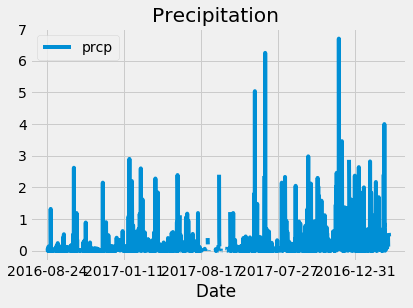

In [239]:
plt.figure()
df.plot(y="prcp")
plt.title("Precipitation ")
plt.xlabel("Date ")



In [227]:
# Design a query to show how many stations are available in this dataset?
availStations = session.query(measurement.station).\
    group_by(measurement.station).\
    order_by(measurement.station).all()
print("Estaciones Diponibles:")
for x in range(len(availStations)):
    print(availStations[x][0])

Estaciones Diponibles:
USC00511918
USC00513117
USC00514830
USC00516128
USC00517948
USC00518838
USC00519281
USC00519397
USC00519523


In [228]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
mostActive =session.query(measurement.station,func.count(measurement.station)).\
        group_by(measurement.station).\
        order_by(func.count(measurement.station).desc()).all()
mostActive

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [247]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station=mostActive[0][0]
results =session.query( "Station:" + measurement.station,"Min:" + func.min(measurement.prcp),"Max:" + func.max(measurement.prcp),"Avg:" +func.avg(measurement.prcp)).\
        filter(measurement.station == station).\
        group_by(measurement.station).\
       all()
results

[('Station:USC00519281', 0.0, 9.64, 'Avg:0.212352092352091')]

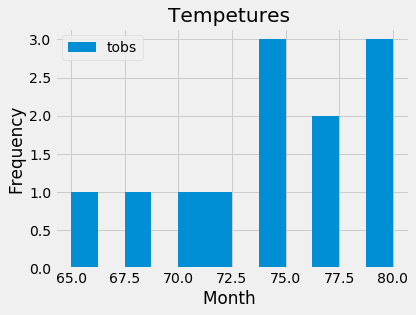

In [267]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station=mostActive[0][0]
results =session.query( func.strftime("%m", measurement.date),measurement.tobs).\
        filter(measurement.station == station).\
        filter(measurement.date >= dateFilter).group_by(func.strftime("%m", measurement.date)).all()

df = pd.DataFrame(results, columns=['date', 'tobs'])
df.set_index('date', inplace=True)
df.plot.hist(bins=12)

plt.tight_layout()
plt.title("Tempetures ")
plt.xlabel("Month ")
plt.show()


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
